In [20]:
from magine.plotting.venn_diagram_maker import create_venn3
import matplotlib.pyplot as plt

In [3]:
import cobra
cobra_config = cobra.Configuration()
cobra_config.solver = "glpk_exact"

In [ ]:
from concerto.helpers.load_model_from_git import load_model_from_git

av = load_model_from_git('Azotobacter')
syn = load_model_from_git('Synechococcus')
rt = load_model_from_git('Rhodosporidium')

In [21]:
def compare_models(model_list):
    metabolite_dict = {}
    ext_metabolite_dict = {}
    for m in model_list:
        metabolite_dict[m.id] = [i.id for i in m.metabolites]
        ext_metabolite_dict[m.id] = [i.id for i in m.metabolites if i.compartment=='e']
    if len(model_list) == 3:
        create_venn3(*metabolite_dict.values(), *metabolite_dict.keys());
        plt.show()
        create_venn3(*ext_metabolite_dict.values(), *ext_metabolite_dict.keys());
    

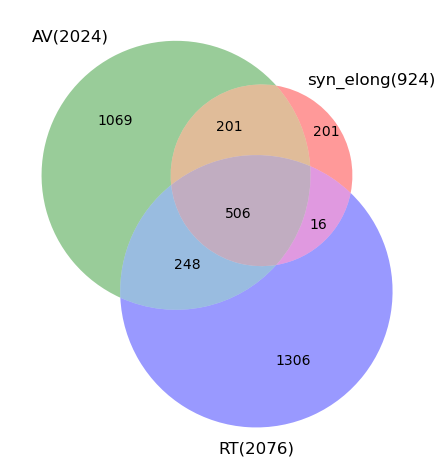

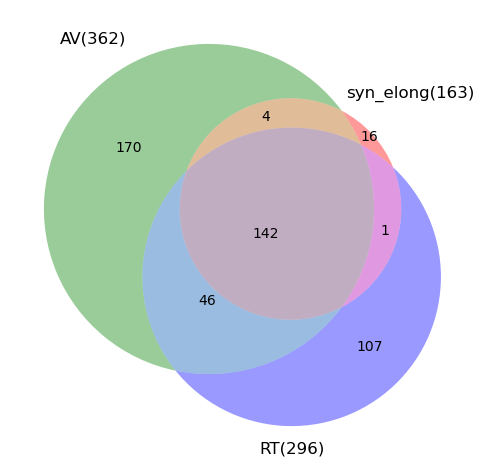

In [22]:
compare_models([av, syn, rt])

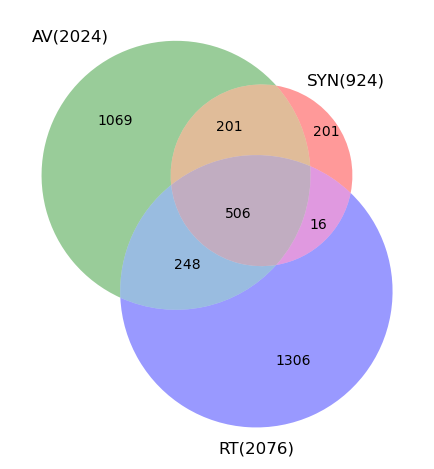

In [5]:
# compare all metabolites across the three models
av_all= [i.id for i in av.metabolites]
syn_all = [i.id for i in syn.metabolites]
rt_all = [i.id for i in rt.metabolites]
create_venn3(av_all, syn_all, rt_all, 'AV', 'SYN', 'RT');

We are interested in metabolites that are imported/exported between the organisms.

In [9]:
av_m = [i.id for i in av.metabolites if i.compartment == 'e']
syn_m = [i.id for i in syn.metabolites if i.compartment == 'e']
rt_m = [i.id for i in rt.metabolites if i.compartment == 'e']
create_venn3(av_m, syn_m, rt_m, 'AV', 'SYN', 'RT');

AttributeError: 'str' object has no attribute 'compartment'

In [ ]:
for i in set(syn_m).difference(av_m):
    print(i)

In [ ]:
unique_to_rt = set(rt_m).difference(syn_m).difference(av_m)

unique_to_syn = set(syn_m).difference(rt_m).difference(av_m)

unique_to_av = set(av_m).difference(rt_m).difference(syn_m)

In [ ]:
for i in [unique_to_av, unique_to_rt, unique_to_syn]:
    print(len(i))

In [ ]:
for i in unique_to_syn:
    print(i)

In [ ]:
### Find metabolites that 'could' be missing from models

In [ ]:
def check_metab_in_org(to_inspect, organism_background):
    background_core = [i.rsplit('_', 1)[0] for i in organism_background]
    found_in_org = set()
    for met in to_inspect:
        met_core = met.rsplit('_', 1)[0]
        if met_core in background_core:
            found_in_org.add(met_core)
    return found_in_org

In [ ]:
check_metab_in_org(set(syn_m).difference(av_m), av_all)

In [ ]:
check_metab_in_org(set(av_m).difference(rt_m), rt_all)

In [ ]:
check_metab_in_org(set(syn_m).difference(rt_m), rt_all)

In [ ]:
check_metab_in_org(set(syn_m).difference(rt_m), rt_m)

In [ ]:
check_metab_in_org(set(rt_m).difference(syn_m), syn_m)

In [ ]:
check_metab_in_org(unique_to_syn, av_m)

In [ ]:
check_metab_in_org(unique_to_syn, rt_m)

In [ ]:
check_metab_in_org(unique_to_rt, av_m)

In [ ]:
check_metab_in_org(unique_to_av, rt_m)